# Masses and volumes

This example notebook shows how electrode and separator densities can be calculated and how the mass- and volume loadings of the electrode stack influence its energy. Therefore, different input options are shown, the loadings are plotted and printed with a dataframe and an interactive plot with a lithium metal electrode is created.

The simplist way to create a TEA class is to start with a PyBaMM parameter-set and add/update values with an input parameter-set.

In [1]:
# %pip install "pybamm[plot,cite]" -q    # install PyBaMM if it is not installed
# !pip install git+https://github.com/pybamm-team/pybamm-tea.git # install PyBaMM-TEA if it is not installed
import pybamm
import pybamm_tea
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:187: UserWarning: 'Negative electrode active material density [kg.m-3]' and 'Negative electrode dry density [kg.m-3]' have been calculated from; 'Electrolyte density [kg.m-3]', 'Negative electrode porosity' and 'Negative electrode density [kg.m-3]'
  warnings.warn(
C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:187: UserWarning: 'Positive electrode active material density [kg.m-3]' and 'Positive electrode dry density [kg.m-3]' have been calculated from; 'Electrolyte density [kg.m-3]', 'Positive electrode porosity' and 'Positive electrode density [kg.m-3]'
  warnings.warn(
C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:430: UserWarning: 'Initial loss of lithium inventory' is set to 0.
  warnings.warn("'Initial loss of lithium inventory' is set to 0.")


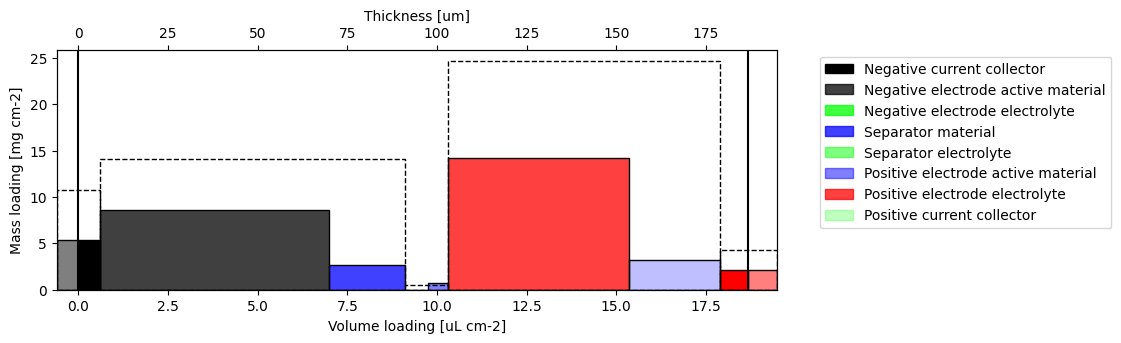

,Volume loading [uL.cm-2],Mass loading [mg.cm-2],Density [mg.uL-1]
Negative electrode electrolyte,2.1300,2.717880,1.276000
Negative electrode active material,6.3900,8.549820,1.338000
Negative electrode inactive material,0.0000,0.000000,0.000000
Negative electrode dry,8.5200,11.399760,1.338000
Negative electrode,8.5200,14.117640,1.657000
Positive electrode electrolyte,2.5326,3.231598,1.276000
Positive electrode active material,5.0274,14.250366,2.834540
Positive electrode inactive material,0.0000,0.000000,0.000000
Positive electrode dry,7.5600,21.429122,2.834540
Positive electrode,7.5600,24.660720,3.262000


In [2]:
# input parameter-set
input = {
    "Electrolyte density [kg.m-3]": 1276, # LiPF6 in EC:EMC 3:7 + 2% VC
}

# base parameter-sets
base = pybamm.ParameterValues("Chen2020")

# create a TEA class
tea_class = pybamm_tea.TEA(base, input)

# plot the mass and volume loadings
tea_class.plot_masses_and_volumes()

# get the mass and volume loadings as a dataframe
tea_class.masses_and_volumes_dataframe


### Did you spot the negative separator material density?

The separator material density was calculated as the remainder from the _parameter-set-_ separator density and the _input_ electrolyte density with respect to the volume fractions.

\begin{equation*}
\rho_{\text {separator material}}=\frac{\rho_{\text {separator }}-\varepsilon_{}\rho_{\text {electrolyte }}}{v_{\text {separator material}}}
\end{equation*}

\begin{equation*}
\rho_{\text {inactive }}=\frac{\rho_{\text {electrode }}-v_{\text {active }} \rho_{\text {active }}-\varepsilon_{}\rho_{\text {electrolyte }}}{v_{\text {inactive }}}
\end{equation*}

In this specific example case, the value for the (wet) separator density gives the value of the dry separator density, which leads to the negative value, similarly also inactive material densities can become negative with the top-down calculation. Another special case of this parameter-set is that there are no inactive materials considered explicitly, so that no active material densities need to be provided, as they can be calculated as the dry electrode densities. If inactive materials are added, also densities for active or inactive materials need to be supplied.

Let's update the separator density.

The separator density can directly be inputted, but also be updated based on the dry separator density or the separator material density as input (if one of both is supplied and the other not). If both dry separator density and separator material density are supplied, the separator porosity is updated.

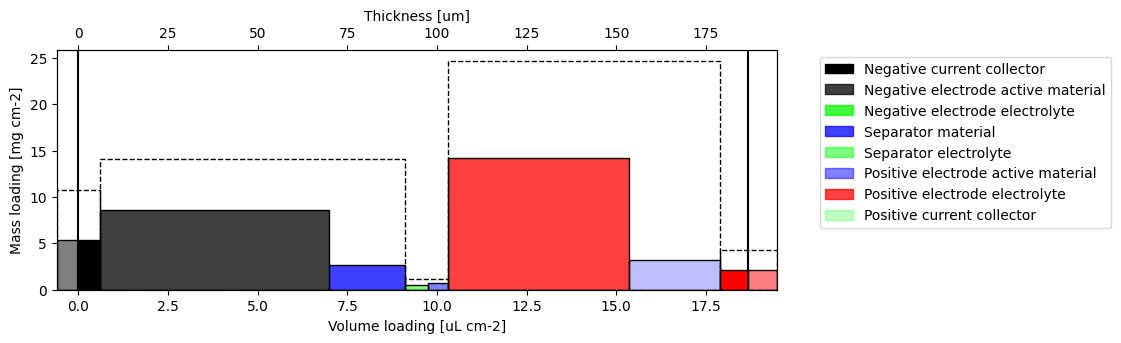

,Volume loading [uL.cm-2],Mass loading [mg.cm-2],Density [mg.uL-1]
Negative electrode electrolyte,2.1300,2.717880,1.276000
Negative electrode active material,6.3900,8.549820,1.338000
Negative electrode inactive material,0.0000,0.000000,0.000000
Negative electrode dry,8.5200,11.399760,1.338000
Negative electrode,8.5200,14.117640,1.657000
Positive electrode electrolyte,2.5326,3.231598,1.276000
Positive electrode active material,5.0274,14.250366,2.834540
Positive electrode inactive material,0.0000,0.000000,0.000000
Positive electrode dry,7.5600,21.429122,2.834540
Positive electrode,7.5600,24.660720,3.262000


In [3]:
input["Separator dry density [kg.m-3]"] = pybamm.ParameterValues("Chen2020").get("Separator density [kg.m-3]")
tea_class = pybamm_tea.TEA(base, input)
tea_class.plot_masses_and_volumes()
tea_class.masses_and_volumes_dataframe

### Electrode density calculation

For the electrode density calculation, more flexibility with the input is possible - there are five options;

1. The simplist way for adding inactive materials is to provide an inactive material density and dry electrode mass fraction. Based on those, the electrode density and the active material volume fraction are updated.

\begin{equation*}
\begin{aligned}
& v_{\text {active }}=(1-\varepsilon) \frac{\frac{w_{\text {active }}}{\rho_{\text {active }}}}{\frac{w_{\text {active }}}{\rho_{\text {active }}}+\frac{1-w_{\text {active }}}{\rho_{\text {inactive }}}} \\
& \rho_{\text {dry electrode }}=v_{\text {active }} \rho_{\text {active }}+\left(1-v_{\text {active }}-\varepsilon\right) \rho_{\text {inactive }} \\
& \rho_{\text {electrode }}=\rho_{\text {dry electrode }}+\varepsilon \rho_{\text {electrolyte }}
\end{aligned}
\end{equation*}

2. The inactive materials can also be splitted into binder and conductive additive. If the dry electrode mass fractions and densities for both are supplied, the inactive material mass fraction and density is calculated from them.

\begin{equation*}
\begin{aligned}
& w_{\text {inactive }}=w_{\text {conductive }}+w_{\text {binder }} \\
& \rho_{\text {inactive }}=\frac{w_{\text {inactive }}}{\frac{w_{\text {conductive }}}{\rho_{\text {conductive }}}+\frac{w_{\text {binder }}}{\rho_{\text {binder }}}} \\
& w_{\text {active }}=1-w_{\text {conductive }}+w_{\text {binder }}
\end{aligned}
\end{equation*}

3. Despite that, one can also input the dry electrode density and active material density together with the active material dry mass fraction to calculate the inactive material density.

\begin{equation*}
\rho_{\text {inactive }}=\frac{1 - w_{\text {active }}}{\frac{1-\varepsilon}{\rho_{\text {dry electrode }}}-\frac{w_{\text {active }}}{\rho_{\text {active }}}}
\end{equation*}

4. Like 3, but with the inactive material density as input and the active material density as output.

5. Finally, if one adds both active and inactive material density on top of the dry electrode density and active material dry mass fraction, the porosity can be estimated based on the material densities. Note, that the supplied material densities may not consider particle swelling with lithiation or binder swelling with electrolyte, such that the actual porosity might be lower than the calculated one below.

\begin{equation*}
\varepsilon=1-\rho_{\text {dry electrode }}\left(\frac{w_{\text {active }}}{\rho_{\text {active }}}+\frac{w_{\text {inactive }}}{\rho_{\text {inactive }}}\right)
\end{equation*}

A short summary:

\begin{aligned}
& w_{\text {conductive }}, \rho_{\text {conductive }}, w_{\text {binder }}, \rho_{\text {binder }} \quad \rightarrow \quad \rho_{\text {inactive }}, w_{\text {active }} \\
& w_{\text {active }}+\text { two of } ( \rho_{\text {active }}, \rho_{\text {inactive }}, \rho_{\text {dry electrode }} ) \rightarrow v_{\text {active }}, \rho_{\text {electrode }}, \rho_x \\
& w_{\text {active }}, \rho_{\text {active }}, \rho_{\text {inactive }}, \rho_{\text {dry electrode }} \quad \rightarrow v_{\text {active }}, \rho_{\text {electrode }}, \varepsilon \\
&
\end{aligned}

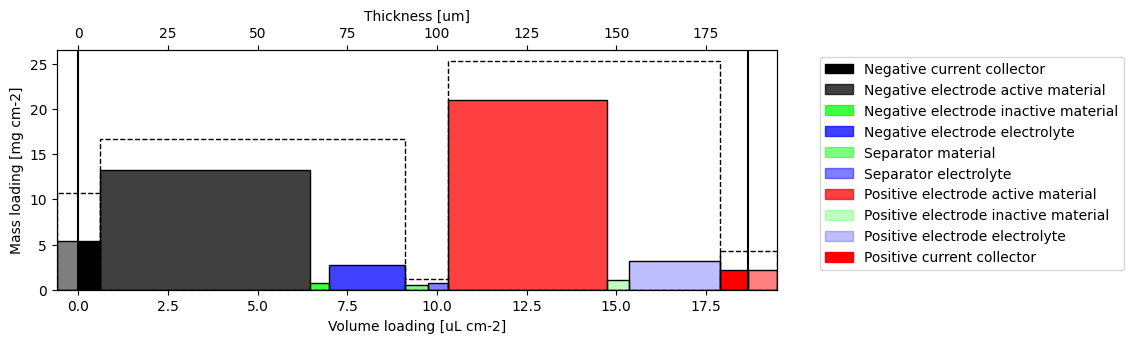

,Volume loading [uL.cm-2],Mass loading [mg.cm-2],Density [mg.uL-1]_1&2,Density [mg.uL-1]_3&5
Negative electrode electrolyte,2.130000,2.717880,1.276000,1.276000
Negative electrode active material,5.872132,13.306252,2.266000,2.266000
Negative electrode inactive material,0.517868,0.700329,1.352332,1.352332
Negative electrode dry,8.520000,14.006581,1.643965,1.643965
Negative electrode,8.520000,16.724461,1.962965,1.962965
Positive electrode electrolyte,2.532600,3.231598,1.276000,1.276000
Positive electrode active material,4.414302,20.967937,4.750000,4.750000
Positive electrode inactive material,0.613098,1.103576,1.800000,1.800000
Positive electrode dry,7.560000,22.071512,2.919512,2.919512
Positive electrode,7.560000,25.303110,3.346972,3.346972


In [4]:
# create an input parameter-set considering "inactive material density"
electrode_1 = {
    "Positive electrode inactive material density [kg.m-3]": 1800, # PVdF and CB
    "Positive electrode active material dry mass fraction": 0.95,
    "Positive electrode active material density [kg.m-3]": 4750, # NMC
}
# create an input parameter-set to calculate the inactive material density from conductive additive- and binder densities
electrode_2 = {
    "Negative electrode binder density [kg.m-3]": (2 * 940 + 1600) / 3, # 2:1 CMC:SBR
    "Negative electrode conductive additive density [kg.m-3]": 1800, # CB
    "Negative electrode binder dry mass fraction": 0.03,
    "Negative electrode conductive additive dry mass fraction": 0.02,
    "Negative electrode active material density [kg.m-3]": 2266, # Graphite
}

# copy input and update with new parameters
inputs_1_2 = input.copy()
inputs_1_2.update(electrode_1)
inputs_1_2.update(electrode_2)

# create a TEA class
tea_class_1_2 = pybamm_tea.TEA(base, inputs_1_2)
tea_class_1_2.plot_masses_and_volumes()

# create an input parameter-set to calculate the inactive material density from the dry electrode density and active material density
electrode_3 = {
    "Positive electrode dry density [kg.m-3]": tea_class_1_2.parameter_values.get("Positive electrode dry density [kg.m-3]"),
    "Positive electrode active material dry mass fraction": 0.95,
    "Positive electrode active material density [kg.m-3]": 4750,
}
# create an input parameter-set to calculate the porosity from the dry electrode-, active- and inactive material density
electrode_5 = {
    "Negative electrode dry density [kg.m-3]": tea_class_1_2.parameter_values.get("Negative electrode dry density [kg.m-3]"),
    "Negative electrode active material dry mass fraction": 0.95,
    "Negative electrode active material density [kg.m-3]": 2266,
    "Negative electrode inactive material density [kg.m-3]": tea_class_1_2.parameter_values.get("Negative electrode inactive material density [kg.m-3]"),
}

# copy input and update with new parameters
inputs_3_5 = input.copy()
inputs_3_5.update(electrode_3)
inputs_3_5.update(electrode_5)

# create a TEA class
tea_class_3_5 = pybamm_tea.TEA(base, inputs_3_5)

# join the dataframes on the index
masses_and_volumes = tea_class_1_2.masses_and_volumes_dataframe.join(tea_class_3_5.masses_and_volumes_dataframe['Density [mg.uL-1]'], lsuffix='_1&2', rsuffix='_3&5')

# display the joined dataframe
display(masses_and_volumes)

### Stack energy

The volumetric stack energy can be calculated from the areal capacity, the average OCP and the (single-)stack thickness, as below:

\begin{equation*}
E_{\text {stack }}^{\text {volumetric }}=\frac{q_{\text {area }}\bar{U}}{\frac{d_{c c}^{-}}{2}+d_{-}+d_{\text {sep}}+d_{+}+\frac{d_{c c}^{+}}{2}}
\end{equation*}

The gravimetric energy density can be calculated by dividing with the stack density, which can be calculated from the compartment thicknesses and densities. One should note that there are no other additional masses and volumes considered yet, as from excess electrolyte or housing. The most interesting stack energy metrics can be found in a dataframe and more metrics can be found in a dictionary.

In [5]:
# display stack energy dataframe
display(tea_class.stack_energy_dataframe)
# display stack energy dictionary
display(tea_class.stack_energy)

,Parameter,Unit,Value
0,Volumetric stack energy,W.h.L-1,997.596702
1,Gravimetric stack energy,W.h.kg-1,392.231953
2,Areal stack energy,W.h.m-2,186.351064
3,Stack average OCP,V,3.713903
4,Capacity,mA.h.cm-2,5.017660
5,Stack thickness,um,186.800000
6,Stack density,kg.L-1,2.543385


{'Negative electrode stoichiometry at 0% SoC': 0.02634730145141186,
 'Negative electrode stoichiometry at 100% SoC': 0.9106121196114546,
 'Positive electrode stoichiometry at 100% SoC': 0.2638491800715496,
 'Positive electrode stoichiometry at 0% SoC': 0.8539736661258583,
 'Negative electrode volumetric capacity [A.h.L-1]': 588.9272781345895,
 'Negative electrode gravimetric capacity [A.h.kg-1]': 355.4177900631198,
 'Negative electrode active material practical capacity [A.h.kg-1]': 440.1549163935647,
 'Negative electrode capacity [mA.h.cm-2]': 5.017660409706703,
 'Negative electrode theoretical capacity [mA.h.cm-2]': 5.674386571374999,
 'Positive electrode volumetric capacity [A.h.L-1]': 663.7116944056485,
 'Positive electrode gravimetric capacity [A.h.kg-1]': 203.46771747567396,
 'Positive electrode active material practical capacity [A.h.kg-1]': 234.1514652838374,
 'Positive electrode capacity [mA.h.cm-2]': 5.017660409706702,
 'Positive electrode theoretical capacity [mA.h.cm-2]': 8

### Lithium metal

Energy densities typically consider the discharged state - a lithiated positive and a delithiated negative active material. For lithium metal, the negative electrode thickness increases with the state-of-charge (SoC) while the total weight of the stack remains constant. To model the decrease in energy density at different SoCs one can update the thickness of the metal electrode and reduce the density of the positive active material by the amount of transferred lithium considering constant particle volume.

\begin{equation*}
t_{\text {lithiated }}^{-}=\frac{\left(y_{initial}-y_{100}\right) n_{\text {th. max }}^{+} M_{L i}}{F \rho_{L i}}
\end{equation*}

\begin{equation*}
\rho_{\text {active, delithiated }}^{+}=\rho_{\text {active, lithiated }}^{+}-M_{L i} C_{\max }^{+}\left(y_{initial}-y_{100}\right)
\end{equation*}

As the negative electrode capacity would limit the total capacity in the discharged state, one can set the maximal concentration to a very high value. You might like to check out the [capacities and potentials notebook](https://github.com/pybamm-team/pybamm-tea/blob/main/examples/capacities_and_potentials.ipynb) for explanation on inputs for capacities and potentials.

In [6]:
def ocp_function(variables):
    return pybamm.Scalar(0)

input_constant = {
    "Negative electrode active material volume fraction": 1,
    "Negative electrode porosity": 0,
    "Negative electrode active material density [kg.m-3]": 534,
    "Positive electrode inactive material density [kg.m-3]": 1800, # PVdF and CB
    "Positive electrode active material dry mass fraction": 0.95,
    "Positive electrode active material density [kg.m-3]": 4750, # NMC
    "Maximum concentration in negative electrode [mol.m-3]": 1e100,
    "Initial concentration in negative electrode [mol.m-3]": 0,
    "Initial concentration in positive electrode [mol.m-3]": tea_class.parameter_values.get("Maximum concentration in positive electrode [mol.m-3]"),
    "Negative electrode OCP [V]": ocp_function,
    "Positive electrode stoichiometry at 0% SoC": tea_class.stack_energy.get("Positive electrode stoichiometry at 0% SoC"),
    "Positive electrode stoichiometry at 100% SoC": tea_class.stack_energy.get("Positive electrode stoichiometry at 100% SoC"),
}

y_initial = 1 # tea_class.stack_energy.get("Initial lithium inventory / positive electrode theoretical capacity")
y100 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 ,0.7, 0.8, 0.9, 1-1e-5]
volumetric_energy = []
negative_electrode_thickness = []

for y100 in y100:
    thickness_density = {
        "Negative electrode thickness [m]": ((y_initial - y100) * tea_class_1_2.stack_energy.get("Positive electrode theoretical capacity [mA.h.cm-2]") *
                                            6.941 / 0.534 / 96485 * 3.6 / 100), # mA.h.cm-2 * g.mol-1 / g.cm-3 / Q.mol-1 * Q.mA.h-1 / cm.m-1 = m
        "Positive electrode active material density [kg.m-3]": (tea_class_1_2.parameter_values.get("Positive electrode active material density [kg.m-3]")-
                                                                0.006941 * tea_class_1_2.parameter_values.get("Maximum concentration in positive electrode [mol.m-3]")*
                                                                (y_initial - y100))
    }
    
    # merge input data
    input_lithium_metal = {**input, **input_constant, **thickness_density}
    
    # create a TEA class
    tea_class_lithium_metal = pybamm_tea.TEA(base, input_lithium_metal)
    
    # save stack energy and negative electrode thickness in the lists
    volumetric_energy.append(tea_class_lithium_metal.stack_energy.get("Volumetric stack energy [W.h.L-1]"))
    negative_electrode_thickness.append(tea_class_lithium_metal.parameter_values.get("Negative electrode thickness [m]"))
    
y100_slider = widgets.FloatSlider(min=0, max=y_initial-1e-5, step=0.01, value=0.4)

@widgets.interact(y100=y100_slider)
def plot_masses_and_volumes(y100):
    thickness_density = {
        "Negative electrode thickness [m]": ((y_initial - y100) * tea_class_1_2.stack_energy.get("Positive electrode theoretical capacity [mA.h.cm-2]")*
                                            6.941 / 0.534 / 96485 * 3.6 / 100), # mA.h.cm-2 * g.mol-1 / g.cm-3 / Q.mol-1 * Q.mA.h-1 / cm.m-1 = m
        "Positive electrode active material density [kg.m-3]": (tea_class_1_2.parameter_values.get("Positive electrode active material density [kg.m-3]")-
                                                                0.006941 * tea_class_1_2.parameter_values.get("Maximum concentration in positive electrode [mol.m-3]")*
                                                                (y_initial - y100))
    }
    
    # merge input data
    input_lithium_metal = {**input, **input_constant, **thickness_density}
    
    # create a TEA class
    tea_class_lithium_metal = pybamm_tea.TEA(base, input_lithium_metal)
    
    # create subplots
    fig, axs = plt.subplots(1, 2, figsize=(25, 5), facecolor="white",gridspec_kw={'width_ratios': [4, 1]})
    
    # plot the volumetric energy in the right subplot
    axs[1].plot([negative_electrode_thickness * 1e6 for negative_electrode_thickness in negative_electrode_thickness], volumetric_energy)
    # add a vertical line at the thickness of the negative electrode
    axs[1].axvline(x=tea_class_lithium_metal.parameter_values.get("Negative electrode thickness [m]") * 1e6, color='r', linestyle='--')
    # add a horizontal line at the volumetric energy of the cell
    axs[1].axhline(y=tea_class_lithium_metal.stack_energy.get("Volumetric stack energy [W.h.L-1]"), color='r', linestyle='--')
    # add axis labels
    axs[1].set_xlabel("Negative electrode thickness [µm]")
    axs[1].set_ylabel("Volumetric energy [W.h.L-1]")
    
    # remove axis from the first plot
    axs[0].axis('off')
    # add negative padding to the left subplot
    axs[0].set_xlim(-0.5, 1.5)
    
    # plot masses and volumes in the left subplot
    tea_class_lithium_metal.plot_masses_and_volumes(axes=axs[0])
    
    # display mass and volume dataframes
    display(tea_class_lithium_metal.masses_and_volumes_dataframe)

interactive(children=(FloatSlider(value=0.4, description='y100', max=0.99999, step=0.01), Output()), _dom_clas…